In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
sns.set()


In [2]:
df = pd.read_csv("house_prices.csv")
df.fillna(0, inplace=True)
print("Shape:", df.shape)
df.head()


Shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# Use numeric columns only
X = df.select_dtypes(include=[np.number]).copy()
# Identify target name — common in this dataset:
if "median_house_value" in df.columns:
    y = df["median_house_value"]
else:
    # fallback: assume last numeric column is target
    target_col = X.columns[-1]
    y = X[target_col]
    X = X.drop(columns=[target_col])
print("Features:", X.columns.tolist())
print("Target sample:")
y.head()


Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Target sample:


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (16512, 9) Test shape: (4128, 9)


In [6]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
print("Model trained.")


Model trained.


In [14]:
y_pred = model.predict(X_test)
y_pred


array([ 47681.88415655,  45517.40916634, 499936.33517089, ...,
       499972.46027742,  71999.26565769, 151513.68347337], shape=(4128,))

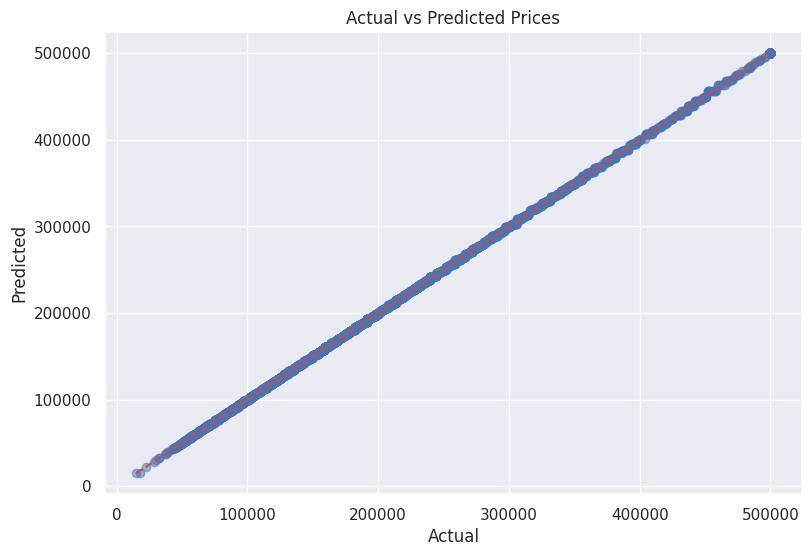

Saved: task6_plot.png


In [15]:
plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices")
plt.savefig("task6_plot.png", bbox_inches='tight')
plt.show()
print("Saved: task6_plot.png")


median_house_value    9.999995e-01
median_income         1.031739e-07
latitude              9.209695e-08
population            6.585512e-08
total_rooms           6.515625e-08
longitude             4.791706e-08
total_bedrooms        3.556531e-08
households            3.066460e-08
housing_median_age    2.455090e-08
dtype: float64

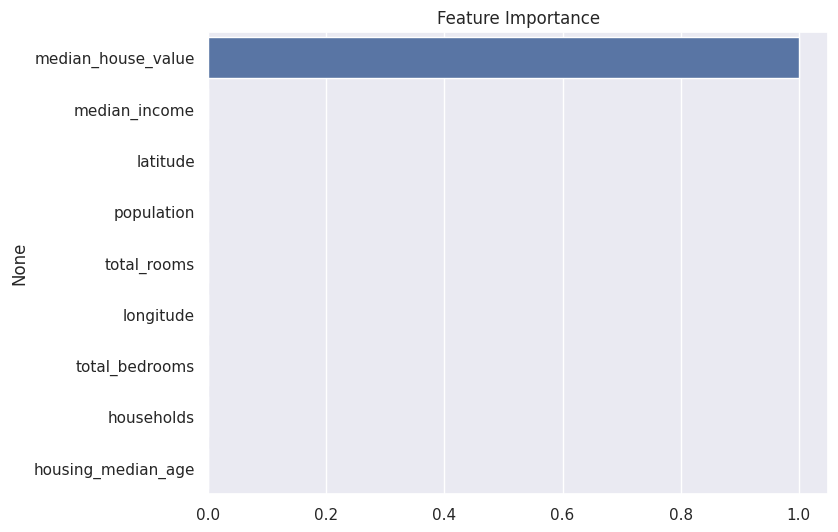

Saved: task6_feature_importance.png


In [16]:
imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
display(imp.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x=imp.values, y=imp.index)
plt.title("Feature Importance")
plt.savefig("task6_feature_importance.png", bbox_inches='tight')
plt.show()
print("Saved: task6_feature_importance.png")


In [9]:
joblib.dump(model, "house_price_model.pkl")
print("Saved model: house_price_model.pkl")


Saved model: house_price_model.pkl


In [17]:
## Conclusion
# Model: GradientBoostingRegressor
# Metrics: (see MAE & RMSE above)

